In [1]:
import cv2
import numpy as np
import random
#1-i
import os

# Define the path to the PASCAL VOC dataset
pascal_voc_path = 'C://Users//13164//Downloads//download//VOCdevkit//VOC2012//JPEGImages'

# Function to compute image statistics
def compute_image_statistics(image):
    mean, std = cv2.meanStdDev(image)
    return mean, std

# Function to compute image histogram
def compute_image_histogram(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    return hist

# Function to perform histogram equalization
def perform_histogram_equalization(image):
    equalized_image = cv2.equalizeHist(image)
    return equalized_image

# Function to binarize an image
def binarize_image(image, threshold=128):
    _, binary_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    return binary_image

# Get a list of image files in the dataset
image_files = os.listdir(pascal_voc_path)

# Randomly select three images
selected_images = random.sample(image_files, 3)

for image_file in selected_images:
    # Load the image
    image_path = os.path.join(pascal_voc_path, image_file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # (a) Compute image statistics
    mean, std = compute_image_statistics(image)
    print(f"Image: {image_file}")
    print(f"Mean: {mean[0][0]}, Standard Deviation: {std[0][0]}")

    # (b) Compute image histogram
    hist = compute_image_histogram(image)
    # You can print or visualize the histogram here

    # (c) Perform histogram equalization
    equalized_image = perform_histogram_equalization(image)
    # You can display the original and equalized images here

    # (d) Binarize the image
    binary_image = binarize_image(image)
    # You can display the binary image here



Image: 2012_002352.jpg
Mean: 166.1983073770492, Standard Deviation: 68.6815313752763
Image: 2012_000999.jpg
Mean: 136.69000533333335, Standard Deviation: 29.05383030353545
Image: 2008_000094.jpg
Mean: 68.438512, Standard Deviation: 47.353707020244876


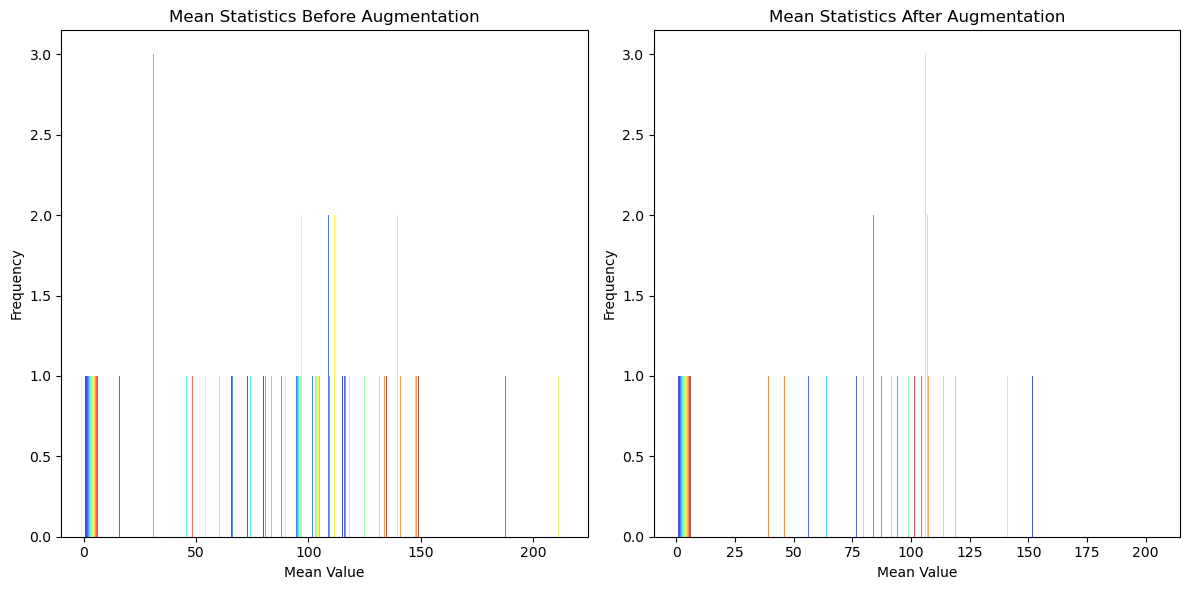

In [5]:
#1-ii
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the path to the PASCAL VOC dataset
pascal_voc_path = "C://Users//13164//OneDrive//Desktop//image_path"

# Function to compute image statistics
def compute_image_statistics(image):
    mean = cv2.mean(image)
    return mean

# Function to apply affine transformations
def apply_affine_transform(image):
    rows, cols, _ = image.shape

    # Randomly generate transformation parameters
    scale = random.uniform(0.8, 1.2)
    rotation_angle = random.uniform(-15, 15)
    tx = random.uniform(-10, 10)
    ty = random.uniform(-10, 10)

    # Define the transformation matrix
    matrix = cv2.getRotationMatrix2D((cols/2, rows/2), rotation_angle, scale)
    matrix[0, 2] += tx
    matrix[1, 2] += ty

    # Apply the affine transformation
    transformed_image = cv2.warpAffine(image, matrix, (cols, rows))

    return transformed_image

# Number of images in the subset
subset_size = 150

# Lists to store mean statistics before and after augmentation
mean_stats_before = []
mean_stats_after = []

# Load and process the images
for i in range(subset_size):
    # Load an image
    image_file = random.choice(os.listdir(pascal_voc_path))
    image_path = os.path.join(pascal_voc_path, image_file)
    image = cv2.imread(image_path)

    # (a) Compute mean statistics before augmentation
    mean_before = compute_image_statistics(image)
    mean_stats_before.append(mean_before)

    # (b) Apply affine transformation
    augmented_image = apply_affine_transform(image)

    # (c) Compute mean statistics after augmentation
    mean_after = compute_image_statistics(augmented_image)
    mean_stats_after.append(mean_after)

# Generate a unique color for each data point
colors_before = [plt.cm.jet(i/subset_size) for i in range(subset_size)]
colors_after = [plt.cm.jet(i/subset_size) for i in range(subset_size)]

# Plot histograms
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.hist(mean_stats_before, bins=30, color=colors_before, alpha=0.7)
plt.title('Mean Statistics Before Augmentation')
plt.xlabel('Mean Value')
plt.ylabel('Frequency')

plt.subplot(122)
plt.hist(mean_stats_after, bins=30, color=colors_after, alpha=0.7)
plt.title('Mean Statistics After Augmentation')
plt.xlabel('Mean Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


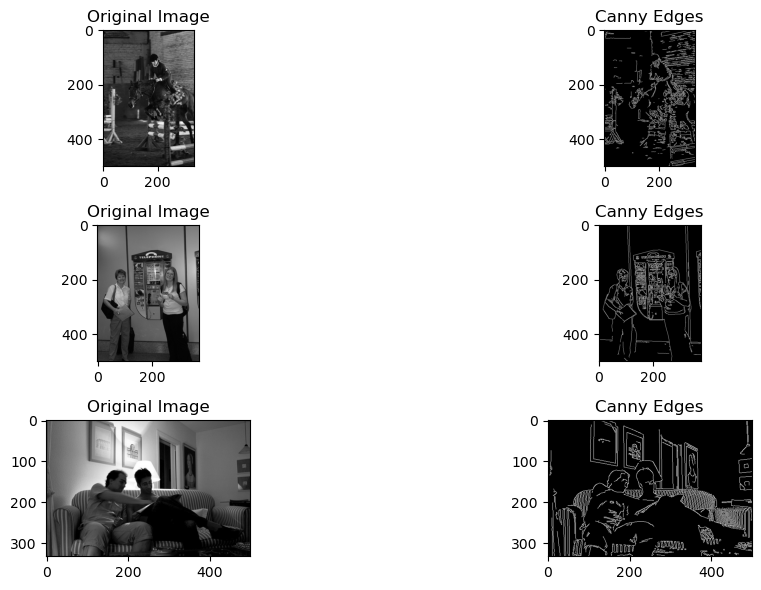

In [6]:
# Define the path to the PASCAL VOC dataset
pascal_voc_path = "C://Users//13164//OneDrive//Desktop//image_path"

#2
# Function to apply Canny edge detection
def apply_canny_edge_detection(image):
    edges = cv2.Canny(image, 100, 200)  
    return edges

# Number of images to process
num_images = 3

# Create a figure to display images
plt.figure(figsize=(12, 6))

for i in range(num_images):
    # Randomly select an image
    image_file = random.choice(os.listdir(pascal_voc_path))
    image_path = os.path.join(pascal_voc_path, image_file)

    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Canny edge detection
    edges = apply_canny_edge_detection(image)

    # Plot the original image and the edges side by side
    plt.subplot(num_images, 2, i*2 + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap='gray')
    plt.title('Original Image')

    plt.subplot(num_images, 2, i*2 + 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edges')

plt.tight_layout()
plt.show()


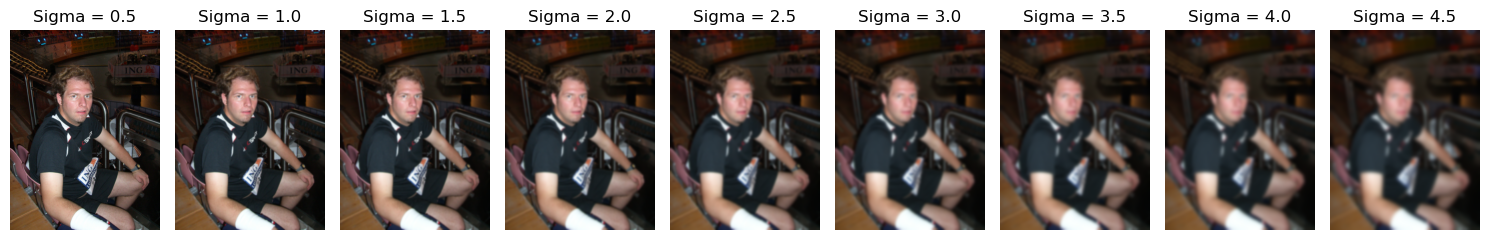

In [9]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# Load an image (replace with your image path)
image_path = "C://Users//13164//Downloads//download//VOCdevkit//VOC2012//JPEGImages//2012_001550.jpg"
image = cv2.imread(image_path)

# Function to apply Gaussian blur with a given sigma and display the image
def apply_gaussian_blur(image, sigma):
    blurred = cv2.GaussianBlur(image, (0, 0), sigmaX=sigma, sigmaY=sigma)
    return blurred

# List of sigma values to test
sigma_values = np.arange(0.5, 5.0, 0.5)

# Create a figure to display images
plt.figure(figsize=(15, 5))

for i, sigma in enumerate(sigma_values):
    # Apply Gaussian blur with the current sigma
    blurred_image = apply_gaussian_blur(image, sigma)

    # Display the blurred image
    plt.subplot(1, len(sigma_values), i + 1)
    plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Sigma = {sigma}')
    plt.axis('off')

plt.tight_layout()
plt.show()
